Homework 1 EPAM Systems

Before diving into all the code snippets or numerous numbers, we have to ask why we are doing this. What is our goal and how can it be achieved?

Here, we will review the dataset about bank marketing because the company demands future predictions. Our goal is to give an insightful report and model/predictions to the bank.

This process involves:

EDA Analysis

Data Preparation

Dimensionality Reduction

Additional note: I am aware that this work is not good; there are a lot of misconceptions or incorrect practices. I am writing this just for self-evaluation. The timeline exactly collides with my college midterm week (11-23 Nov). I read all resources, watched all videos, but when I tried to create the project, I didn't have much time and I couldn't implement what I learned. I have to manage my time better; this is my fault.



in here we will import neceserray librarries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from IPython.display import HTML, display

In [2]:
url = 'https://raw.githubusercontent.com/mtech00/EPAM_DS/refs/heads/main/bank-additional-full.csv'  # Dataset publicly available and I decided to add it to my repo
data = pd.read_csv(url, delimiter=';')
print(data.head())  # Here we are just ensuring the data is imported
print(data.shape)   # Before understanding what's inside the dataset, understanding dimensionality is important. For example, human eyes first detect the objects' sizes, shapes, etc., after that examine the color or depth of the object


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

We see 41,188 rows and 21 columns. Now we will examine what these columns are. I will use the dataset source explanation:

In [3]:
# ============================ Input Variables =============================

# -------------------------- Bank Client Data ------------------------------
#  1. age              : (Numeric) Age of the client.
#  2. job              : (Categorical) Type of job. Options:
#                        ["admin.", "blue-collar", "entrepreneur", "housemaid",
#                         "management", "retired", "self-employed", "services",
#                         "student", "technician", "unemployed", "unknown"]
#  3. marital          : (Categorical) Marital status. Options:
#                        ["divorced", "married", "single", "unknown"]
#                        *Note: "divorced" includes divorced or widowed.
#  4. education        : (Categorical) Education level. Options:
#                        ["basic.4y", "basic.6y", "basic.9y", "high.school",
#                         "illiterate", "professional.course",
#                         "university.degree", "unknown"]
#  5. default          : (Categorical) Has credit in default? Options:
#                        ["no", "yes", "unknown"]
#  6. housing          : (Categorical) Has housing loan? Options:
#                        ["no", "yes", "unknown"]
#  7. loan             : (Categorical) Has personal loan? Options:
#                        ["no", "yes", "unknown"]

# ---------- Related to the Last Contact of the Current Campaign ----------
#  8. contact          : (Categorical) Contact communication type. Options:
#                        ["cellular", "telephone"]
#  9. month            : (Categorical) Last contact month. Options:
#                        ["jan", "feb", "mar", ..., "nov", "dec"]
# 10. day_of_week      : (Categorical) Last contact day. Options:
#                        ["mon", "tue", "wed", "thu", "fri"]
# 11. duration         : (Numeric) Last contact duration (seconds).
#                        *Important: Highly affects the output target.
#                        *Recommendation: Exclude for realistic predictive modeling.

# ---------------------------- Other Attributes ----------------------------
# 12. campaign         : (Numeric) Number of contacts during this campaign
#                        (includes the last contact).
# 13. pdays            : (Numeric) Days since the client was last contacted
#                        (999 indicates no previous contact).
# 14. previous         : (Numeric) Number of previous contacts before this
#                        campaign.
# 15. poutcome         : (Categorical) Outcome of the previous campaign. Options:
#                        ["failure", "nonexistent", "success"]

# -------------- Social and Economic Context Attributes --------------------
# 16. emp.var.rate     : (Numeric) Employment variation rate (quarterly).
# 17. cons.price.idx   : (Numeric) Consumer price index (monthly).
# 18. cons.conf.idx    : (Numeric) Consumer confidence index (monthly).
# 19. euribor3m        : (Numeric) Euribor 3-month rate (daily).
# 20. nr.employed      : (Numeric) Number of employees (quarterly).

# ============================ Output Variable =============================
# 21. y                : (Binary) Has the client subscribed to a term deposit?
#                        Options: ["yes", "no"]

# ==========================================================================


Now we have a general idea of what we have. Normally, after that step, skimming the business domain would be good, but due to time constraints because of my college midterm week, I have to skip this part.

In our dataset, we have categorical and numerical variables. Looking at the variables in a tree would be good for visual explanation. Here, I will not explain what is numerical or categorical data because when people look at the tree, many can clearly understand what these are.

In [4]:
from IPython.display import Image

# Display the image with reduced size
Image(url='https://bookdown.org/ejvanholm/Textbook/images/DataTypes.png', width=400)


We have seen the base of the tree; now I will categorize these for our dataset:

In [5]:
# Here we are defining the tables
data_restructured = {
    "Continuous": [
        "age", "duration", "emp.var.rate", "cons.price.idx",
        "cons.conf.idx", "euribor3m"
    ],
    "Discrete": [
        "campaign", "pdays", "previous", "nr.employed"
    ],
    "Ordinal": [
        "education"
    ],
    "Nominal": [
        "job", "marital", "default", "housing",
        "loan", "contact", "month", "day_of_week",
        "poutcome", "y"
    ]
}

# We will put the dataframe then we can show it in tabular format
df_restructured = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_restructured.items()]))

# Display the dataframe
df_restructured


,Continuous,Discrete,Ordinal,Nominal
0,age,campaign,education,job
1,duration,pdays,NaN,marital
2,emp.var.rate,previous,NaN,default
3,cons.price.idx,nr.employed,NaN,housing
4,cons.conf.idx,NaN,NaN,loan
5,euribor3m,NaN,NaN,contact
6,NaN,NaN,NaN,month
7,NaN,NaN,NaN,day_of_week
8,NaN,NaN,NaN,poutcome
9,NaN,NaN,NaN,y


I used this as a base model, but I have doubts about whether this table is accurate; probably there are some incorrectness. After the draft, I will review it again.

After that, I want to see the descriptive statistics about numerical values.

Also, I will do it for categorical ones. Firstly, I will take the numerical variables' descriptive statistics in table format; after that, we will draw graphical representations.

In [6]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
descriptive_stats = data[numerical_cols].describe()
# Transpose the table because data as variable; thus, descriptive statistics must be in columns
descriptive_stats = descriptive_stats.transpose()
# Mode calculation
for col in numerical_cols:
    try:
        mode_val = data[col].mode()[0]
        descriptive_stats.loc[col, 'mode'] = mode_val
    except:
        descriptive_stats.loc[col, 'mode'] = 'No mode'

# Range calculation
for col in numerical_cols:
    descriptive_stats.loc[col, 'range'] = data[col].max() - data[col].min()

# Variance calculation
for col in numerical_cols:
    descriptive_stats.loc[col, 'variance'] = data[col].var()

# Skewness calculation
for col in numerical_cols:
    descriptive_stats.loc[col, 'skewness'] = data[col].skew()

# Kurtosis calculation
for col in numerical_cols:
    descriptive_stats.loc[col, 'kurtosis'] = data[col].kurt()

descriptive_stats


,count,mean,std,min,25%,50%,75%,max,mode,range,variance,skewness,kurtosis
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000,31.000,81.000,108.602451,0.784697,0.791312
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000,85.000,4918.000,67225.728877,3.263141,20.247938
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000,1.000,55.000,7.672975,4.762507,36.979795
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000,999.000,999.000,34935.687284,-4.922190,22.229463
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000,0.000,7.000,0.244927,3.832042,20.108816
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400,1.400,4.800,2.467915,-0.724096,-1.062632
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767,93.994,2.566,0.335056,-0.230888,-0.829809
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900,-36.400,23.900,21.420215,0.303180,-0.358558
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045,4.857,4.411,3.008308,-0.709188,-1.406803
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100,5228.100,264.500,5220.283250,-1.044262,-0.003760


Above, mean, std, min, max, etc., are very familiar to a lot of people, maybe variance, but kurtosis and skewness are little statistical terms.

I will try to explain both of them in one sentence.

Skewness helps us understand if the dataset is symmetrically distributed on both sides or not.

Skewness = 0: Perfectly symmetrical. Mean = Median = Mode.
Skewness > 0: Positively skewed, concentrated on the right side. Mean > Median > Mode.
Skewness < 0: Negatively skewed, concentrated on the left side. Mean < Median < Mode.
Kurtosis measures whether the data is similar to a normal distribution, and if not, in which way, like heavy-tailed or light-tailed.

Types of Kurtosis:

Mesokurtic:
Distribution has kurtosis close to 3.
Tails are similar to a normal distribution.
Leptokurtic:
Distribution has kurtosis > 3.
Heavy tails, with more extreme outliers than a normal distribution.
Platykurtic:
Distribution has kurtosis < 3.
Light tails, with fewer extreme outliers.
Flatter peak.
In the next steps, we will show visual explanations for each data.

In [11]:
# Here I tried to add referential visuals. I can show images also with PIL, matplotlib, etc., but I think this is acceptable, clear, and simple.

html_code = """
<table>
    <tr>
        <td><img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*_N2t_tWB7y3_N0ilzgTQng.jpeg" width="400"></td>
        <td><img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*kIjrjUM73-K8agpGRdQ33w.jpeg" width="400"></td>
    </tr>
</table>
"""
display(HTML(html_code))


,


Now we will get some info about categorical variables. Of course, more limited; you can't use mean, etc., but we can use mode, et

In [12]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome', 'y']

descriptive_stats_categorical = data[categorical_cols].describe()

for col in categorical_cols:
     mode_val = data[col].mode()[0]
     descriptive_stats_categorical.loc['frequency', col] = data[col].value_counts().max()

descriptive_stats_categorical = descriptive_stats_categorical.transpose()

descriptive_stats_categorical


,count,unique,top,freq,frequency
job,41188,12,admin.,10422,10422
marital,41188,4,married,24928,24928
education,41188,8,university.degree,12168,12168
default,41188,3,no,32588,32588
housing,41188,3,yes,21576,21576
loan,41188,3,no,33950,33950
contact,41188,2,cellular,26144,26144
month,41188,10,may,13769,13769
day_of_week,41188,5,thu,8623,8623
poutcome,41188,3,nonexistent,35563,35563


This one is simpler: how many unique values? Which one is most repeated and how many counts? How many unique categories do we have?

Now we are going to visualize what we got on histograms and bar charts (there are plenty of graph choices, but now I will try to make it simple, and these ones are acceptable).

Firstly, we will do it for numerical ones, then categorical ones. Finally, we will take a look at the king of the jungle: correlation. It measures how one data affects another data, but we have to understand very well this sentence: "Correlation does not imply causation."

For this purpose, we will create a heat map of the correlation between all variables.

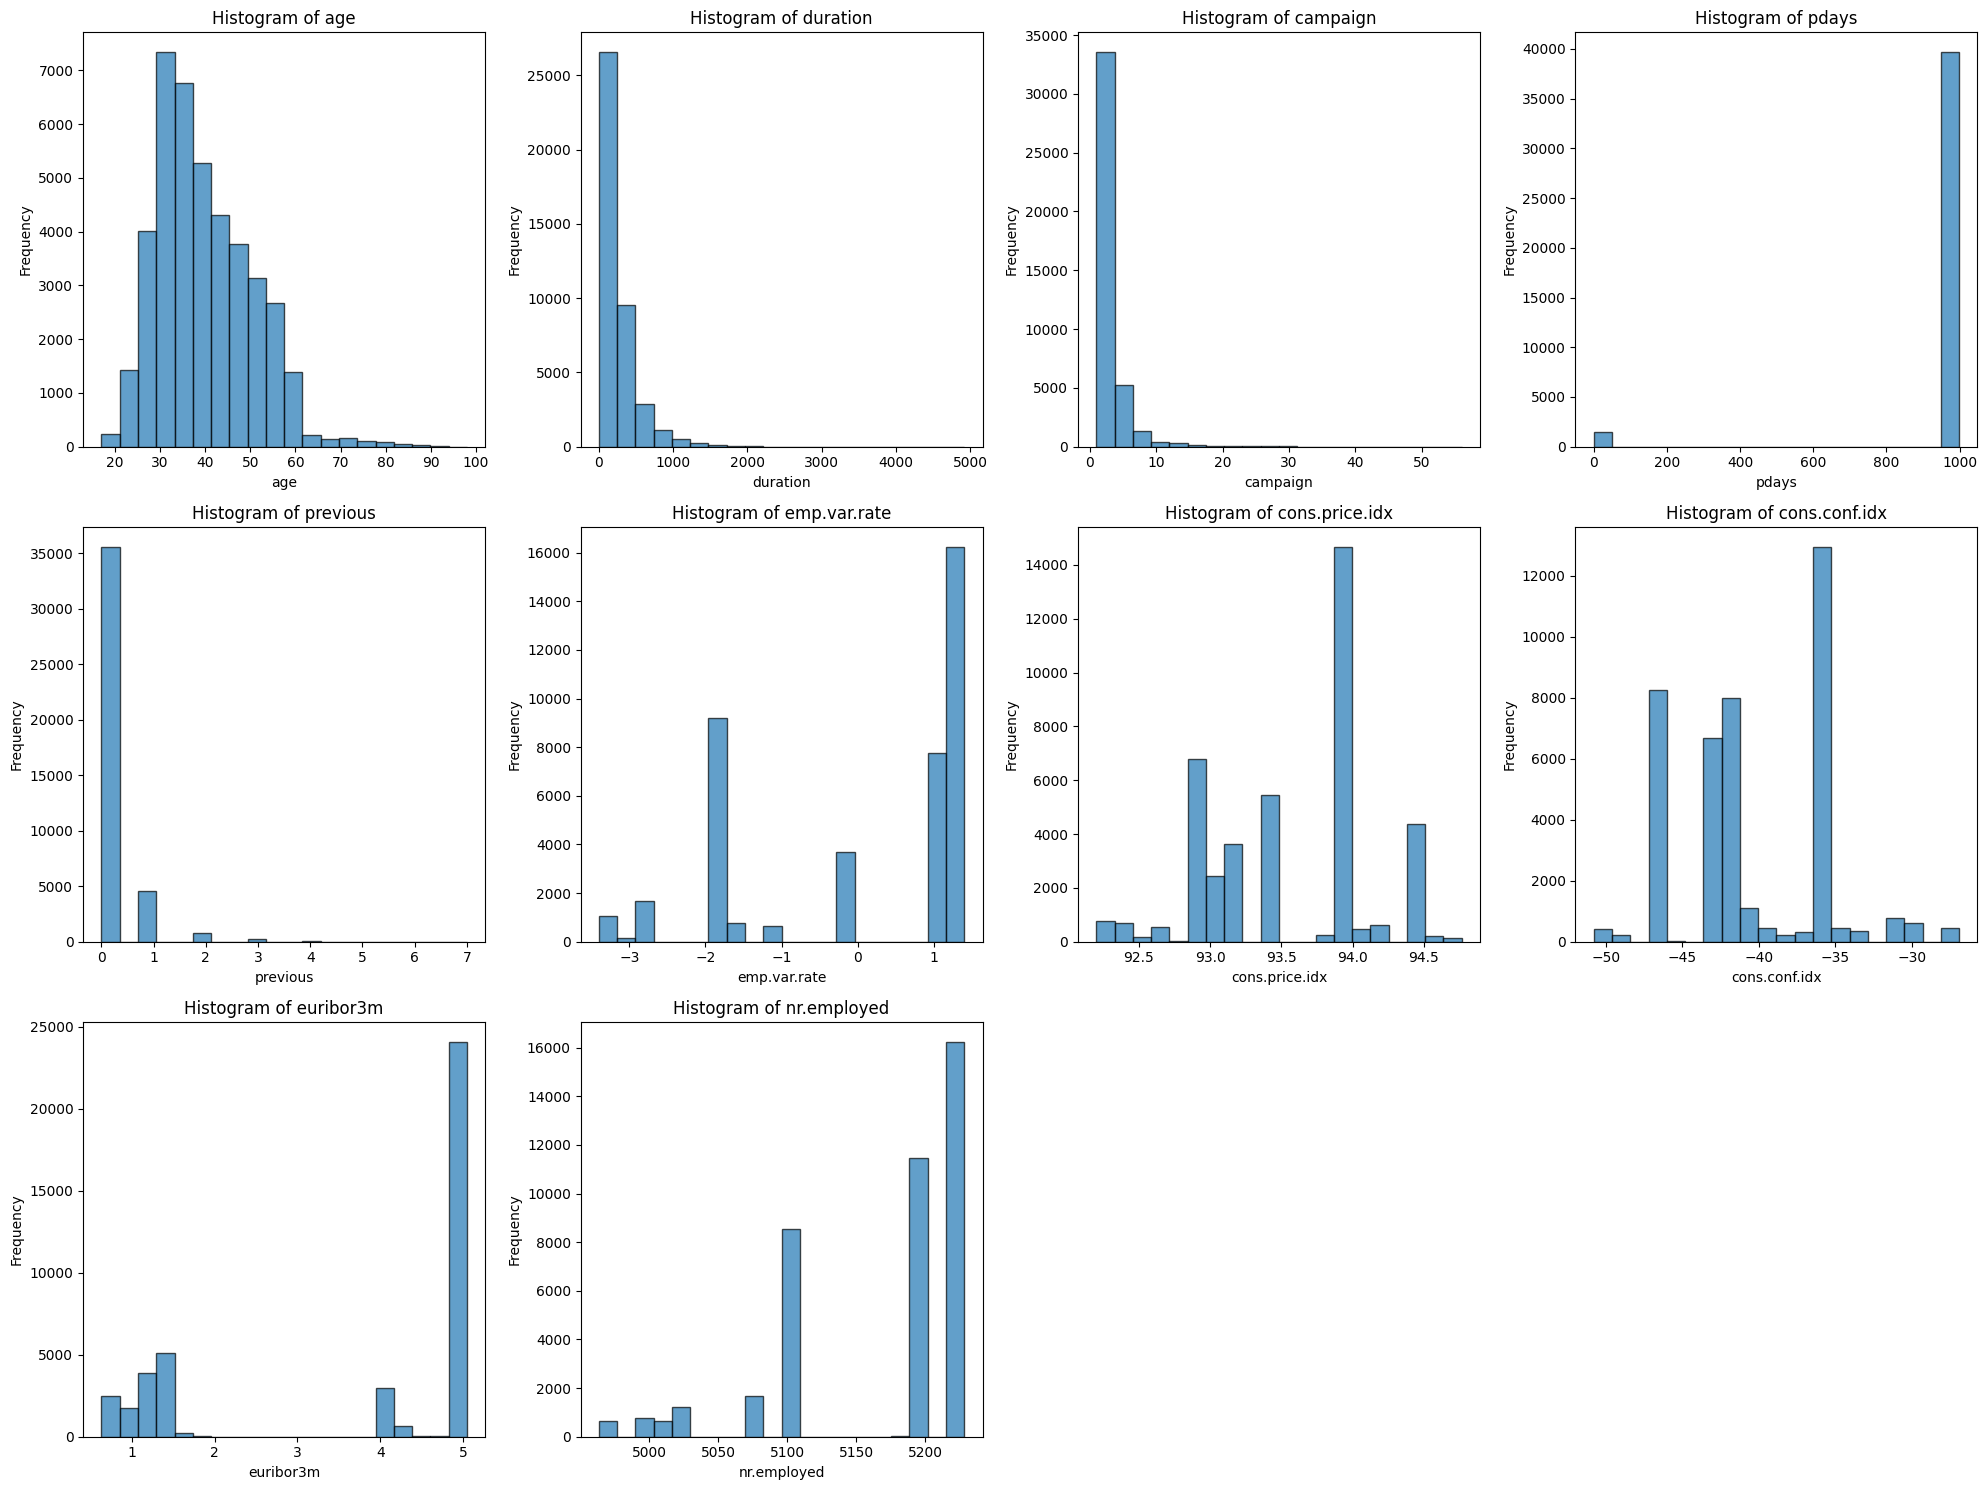

In [13]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                  'euribor3m', 'nr.employed']

# Subplots for better representation; otherwise, it will be huge
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

axes = axes.flatten()

# Loop through columns
for i, col in enumerate(numerical_cols):
    axes[i].hist(data[col], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


When we see the plots, they look pointless; some of them do not represent the data well because we have a lot of outliers and empty values. For example:

13 - pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means the client was not previously contacted).

999 means not contacted. Before diving into the next steps, I want to impute the gaps and handle empty variables.

In [14]:
categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome'
]
data[categorical_cols] = data[categorical_cols].replace('unknown', np.nan)

# 999 is a special value for pdays; we will replace it
data['pdays'] = data['pdays'].replace(999, np.nan)

# I prefer the mode for categorical variables, but normally we must handle them one by one; one size doesn't fit all. Removing categorical variables can be more detrimental than removing outliers
for col in categorical_cols:
    mode = data[col].mode()[0]
    data[col].fillna(mode, inplace=True)

# We are detecting the outliers with IQR values, our bounds
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    # After detecting outlier bounds, we have two options: remove the outliers or just compress the borders
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


<ipython-input-14-805f2d207405>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode, inplace=True)


In [15]:
# Verify the changes
print(data.isnull().sum())


age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64


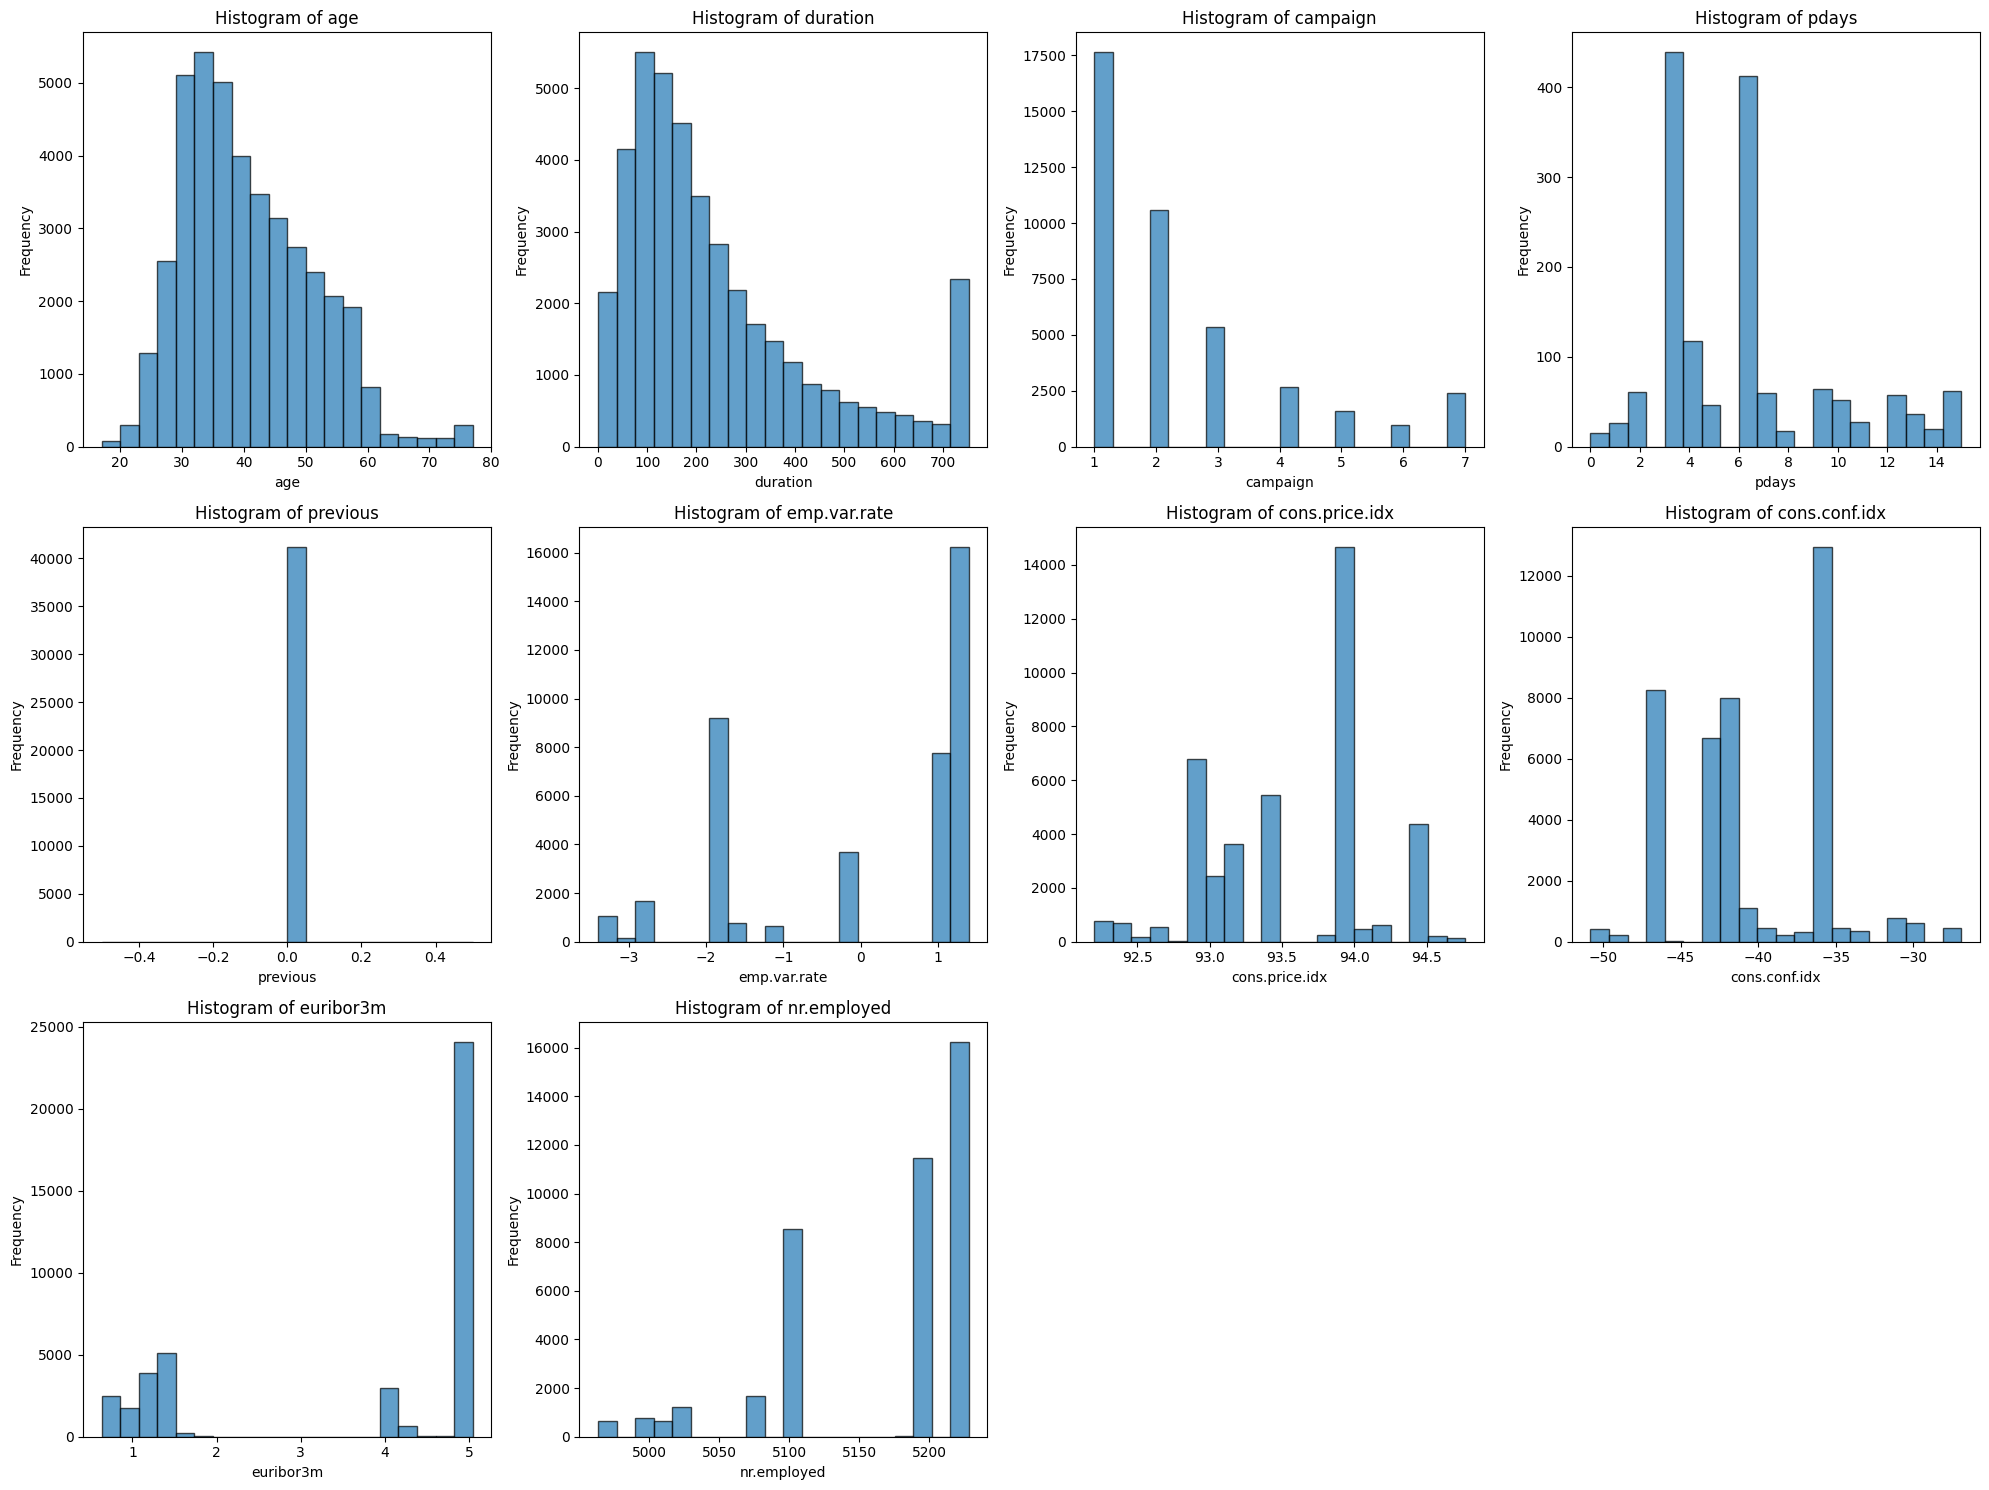

In [16]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                  'euribor3m', 'nr.employed']

# Subplots for better representation; otherwise, it will be huge
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))

axes = axes.flatten()

# Loop through columns
for i, col in enumerate(numerical_cols):
    axes[i].hist(data[col], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')

for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Now I want to draw the categorical ones.

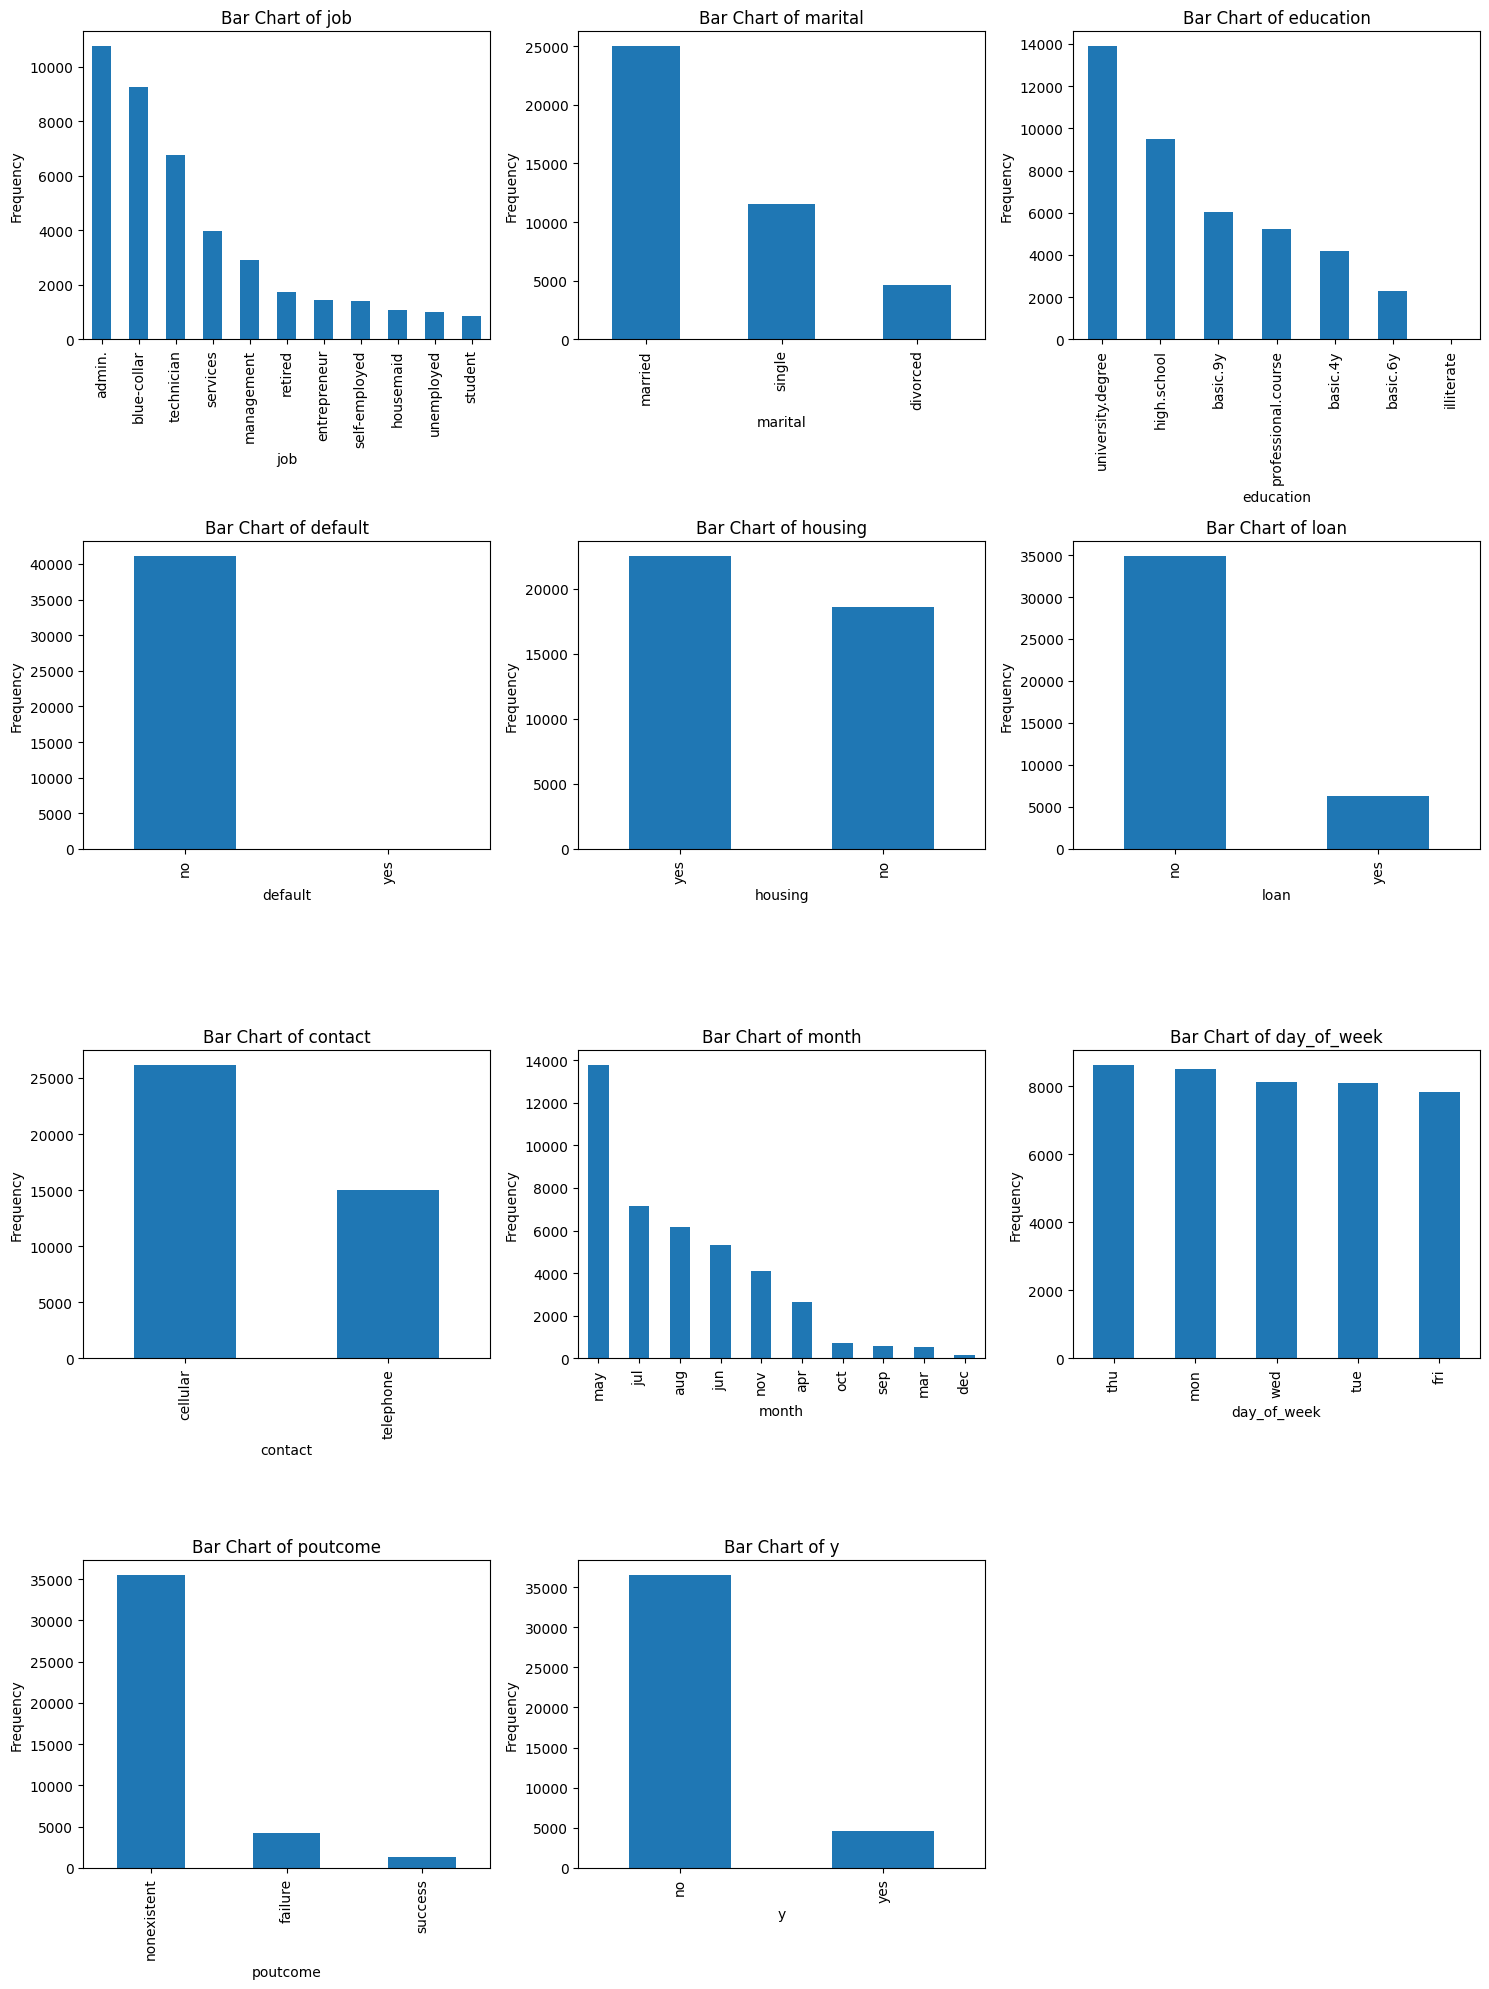

In [17]:
# Assuming 'data' is your DataFrame
categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome', 'y'
]

# Create subplots for better visualization
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Bar Chart of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Now I will try to see connections between variables before going to the heatmap. We will use scatter plots; when we look at the scatter plot, we can identify the correlations.

In [18]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,NaN,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1.0,NaN,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,NaN,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,NaN,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,NaN,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1.0,NaN,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,NaN,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,NaN,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,NaN,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


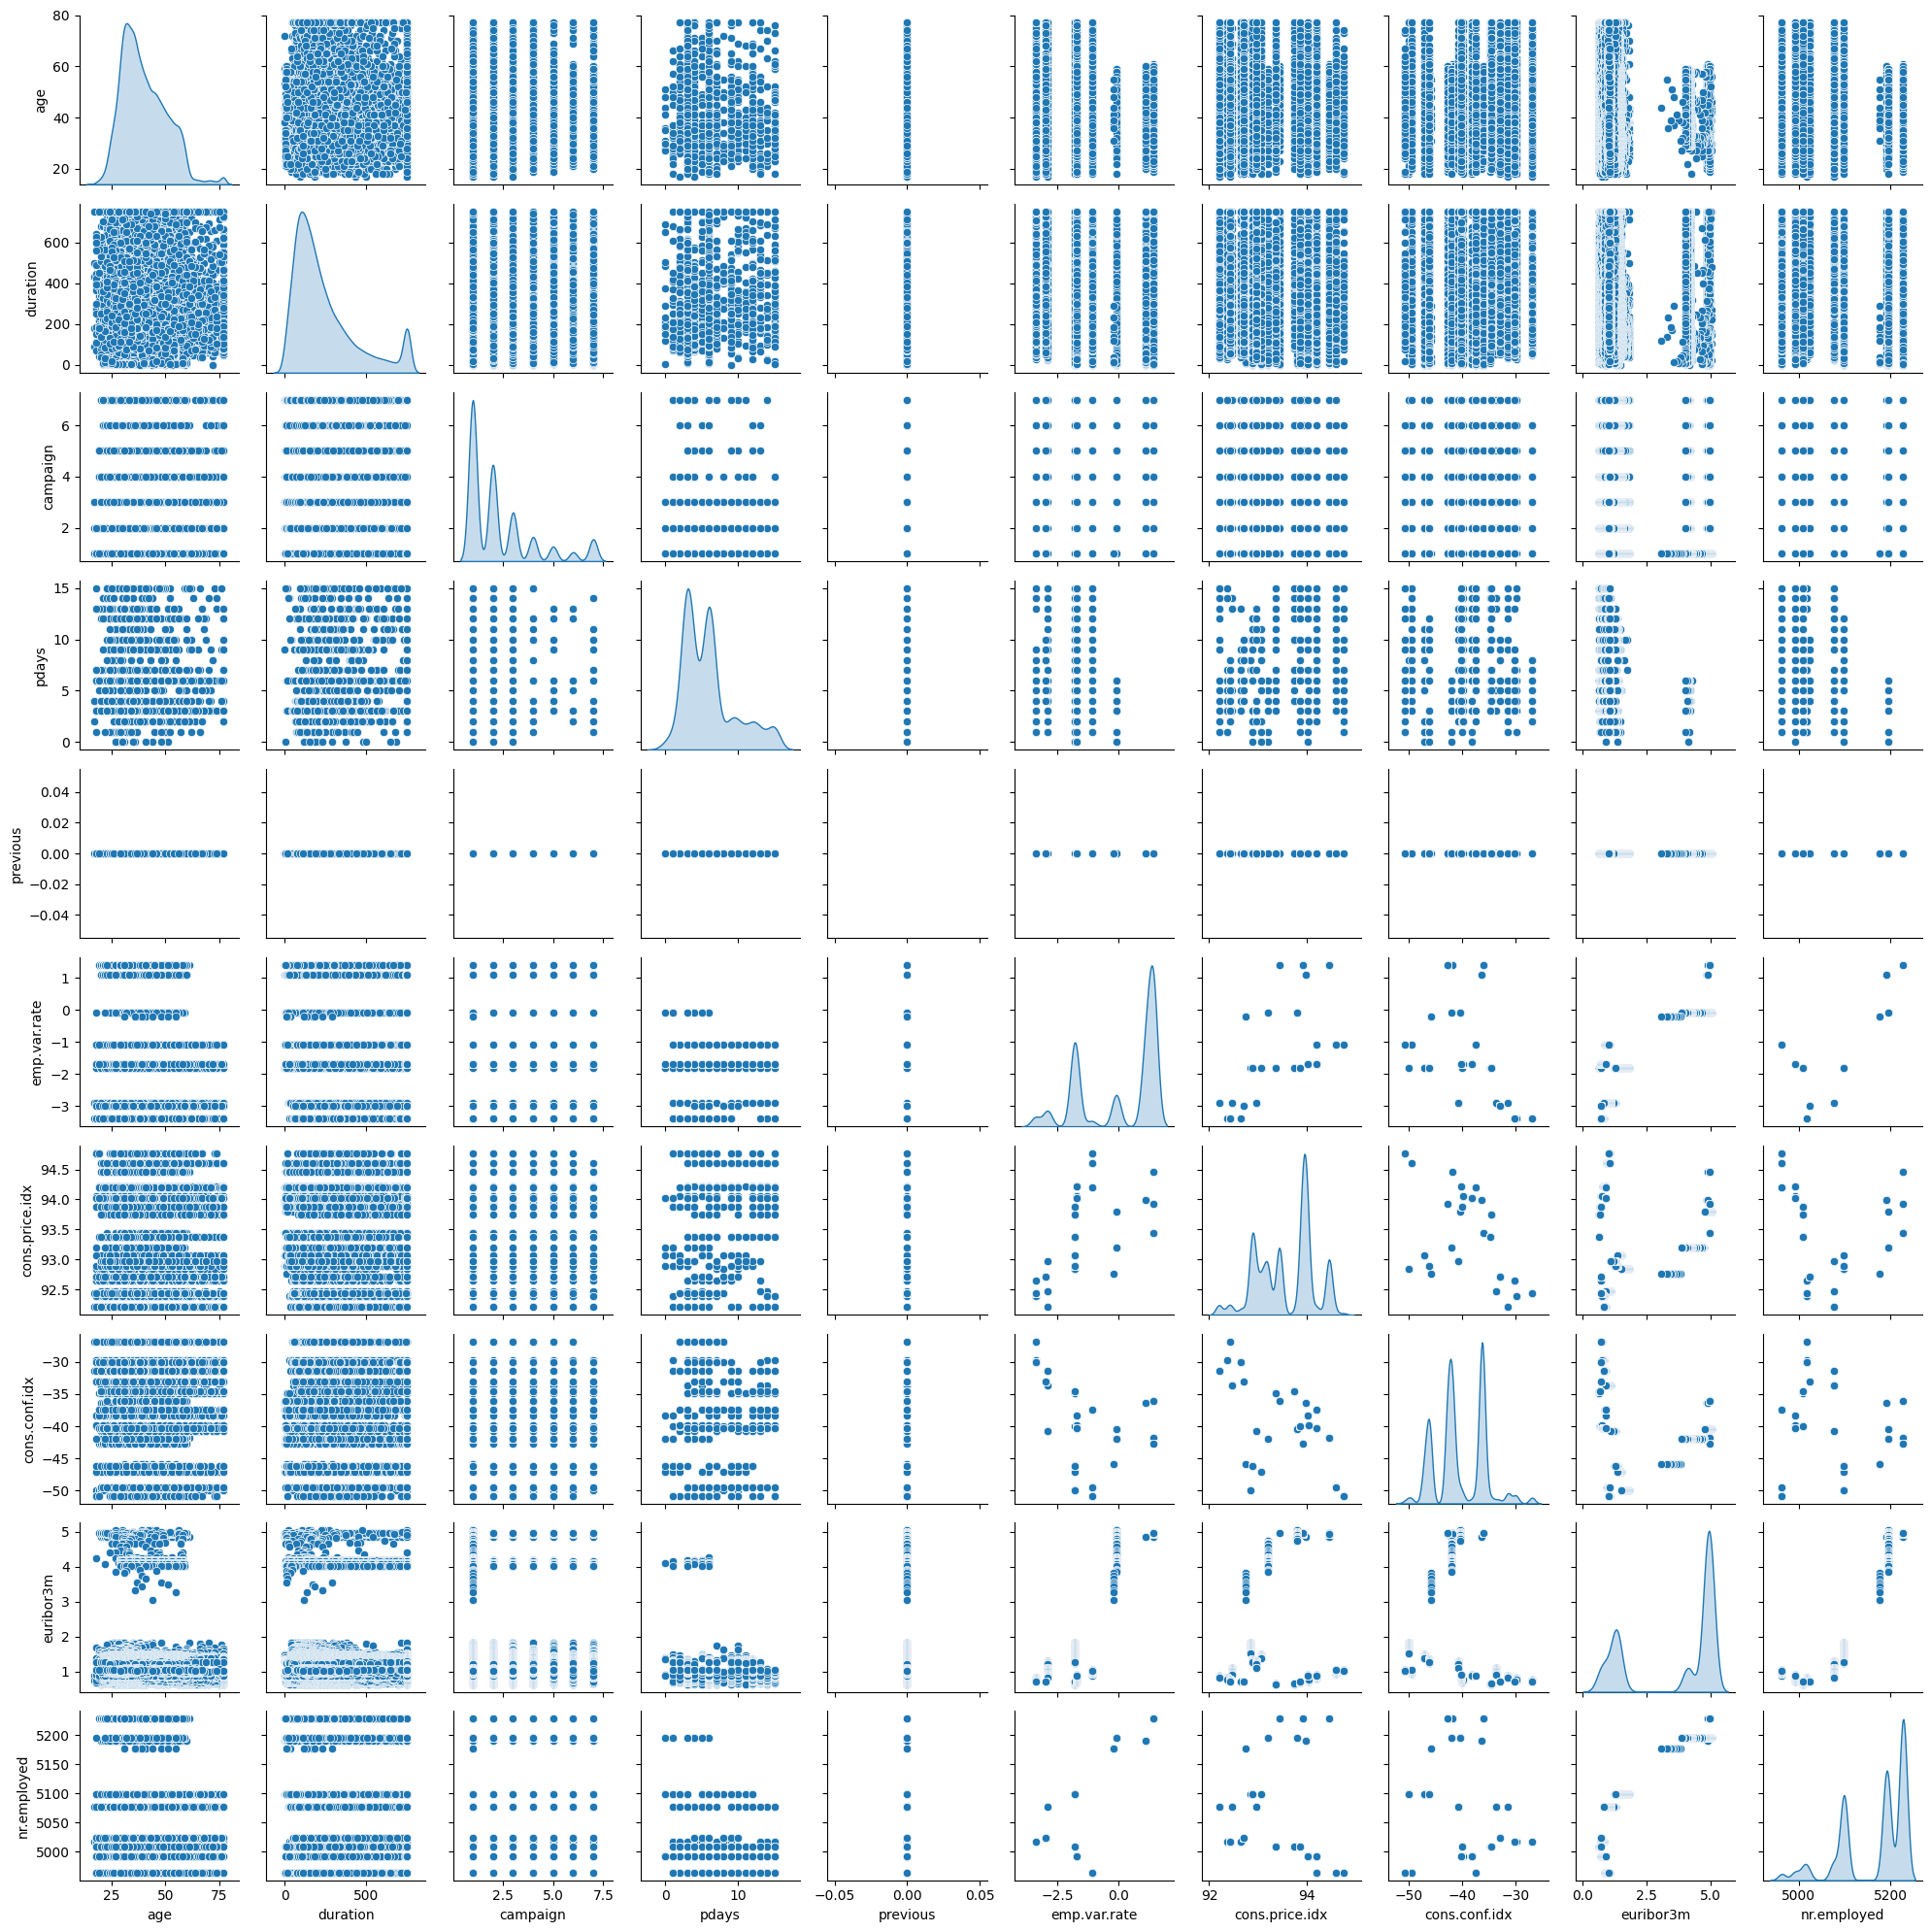

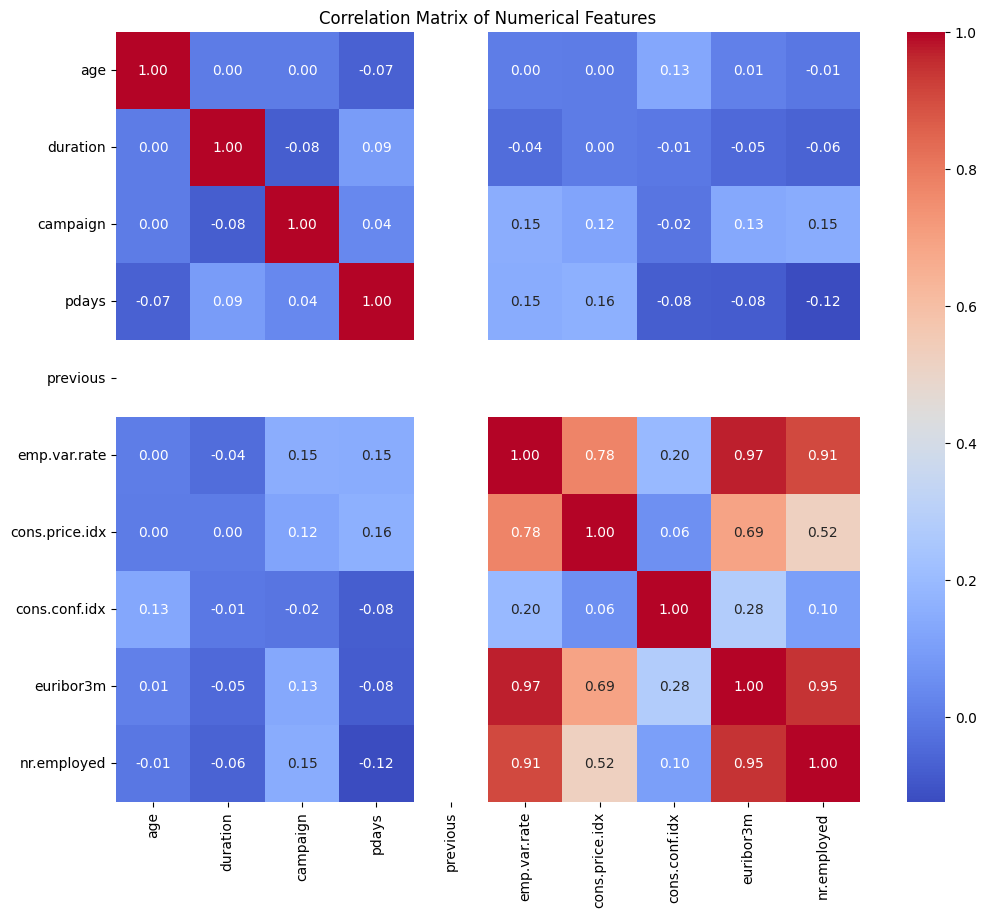

In [21]:
# Here we are drawing scatter plots between all variables
sns.pairplot(data[numerical_cols], diag_kind='kde', height=2)
plt.tight_layout()
plt.show()

# Heatmap is a more robust view of correlations with numerical and color representations
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Mainly, we have information about our data; now we will switch to the data preparation and dimensionality reduction part. After that, the data will be ready for modeling.

Firstly, we will remove unnecessary parts.

In [22]:
# This is now unnecessary, but why? Because I didn't think I created good work here; thus, my work is very sensitive to noise like that. Also, in the explanation of the dataset:
data = data.drop('duration', axis=1)


11 - duration: Last contact duration, in seconds (numeric). Important note: This attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Now, in the next step, we will encode our categorical variables. Due to two main reasons: first, "good" or "bad" is only meaningful for humans who know English, but algorithms can't compare these two (actually, yes they can in more advanced ways, but this is not our topic now).

We have to change "bad" to 0, "good" to 1, then algorithms can make connections about "good" making something more valuable or "bad" making it more useless, effectless, etc.

The second point is running machine learning algorithms over billions of parameters; reducing the values gives a huge performance gain. Instead of multiplying 1000x2000 every time, just multiply 1x2. Also, some algorithms are designed to work with encoded data.

In [23]:
education_order = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
}
data['education'] = data['education'].map(education_order)


In [24]:
# Just added again to ensure everything is okay; this is not a good practice
categorical_cols = [
    "job", "marital", "education", "default",
    "housing", "loan", "contact", "month",
    "day_of_week", "poutcome"
]

# One-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)

for col in data_encoded.select_dtypes(['uint8', 'bool']).columns:
    data_encoded[col] = data_encoded[col].astype(int)

print(data_encoded.head())


    age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0  56.0       1.0    NaN       0.0           1.1          93.994   
1  57.0       1.0    NaN       0.0           1.1          93.994   
2  37.0       1.0    NaN       0.0           1.1          93.994   
3  40.0       1.0    NaN       0.0           1.1          93.994   
4  56.0       1.0    NaN       0.0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed   y  ...  month_oct  month_sep  \
0          -36.4      4.857       5191.0  no  ...          0          0   
1          -36.4      4.857       5191.0  no  ...          0          0   
2          -36.4      4.857       5191.0  no  ...          0          0   
3          -36.4      4.857       5191.0  no  ...          0          0   
4          -36.4      4.857       5191.0  no  ...          0          0   

   day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                0                1                0               

In [25]:
# Encode 'y' as binary
data_encoded['y'] = data_encoded['y'].map({'no': 0, 'yes': 1})


In [26]:

data_encoded = data_encoded.drop('pdays', axis=1)

Now we are scaling the numerical variables for better calculability.

In [27]:
numerical_cols.remove('duration')
numerical_cols.remove('pdays')

# Target and feature definition
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Scaling the numerical values for better calculability

# Here I had some problem with the coding part; I'm sure it is not a complex thing, but my brain stopped here
# I have to send with these meaningless parts
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


Dimensionality reduction is generally a method about explaining the data without losing data or generality. Mathematically, it involves eigenvalues and eigenvectors , changing direction and data in matrixes .

In [28]:


pca = PCA()

pca.fit(X)

X_pca = pca.transform(X)


Here, we will plot how many components we will use. As you can see, nearly 35 components will explain over 90% of the data.

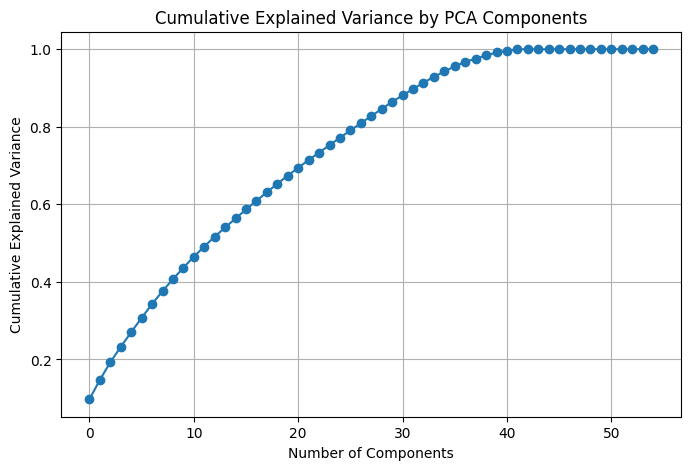

In [29]:


explained_variance = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(8, 5))
plt.plot(explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


After visual representation, we will choose how many components will explain 90% of our data. Generally, 90%, 95%, 99% are good choices depending on the domain.

In [30]:

n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"Number of components explaining at least 90% variance: {n_components}")


Number of components explaining at least 90% variance: 33


In [31]:

pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X)


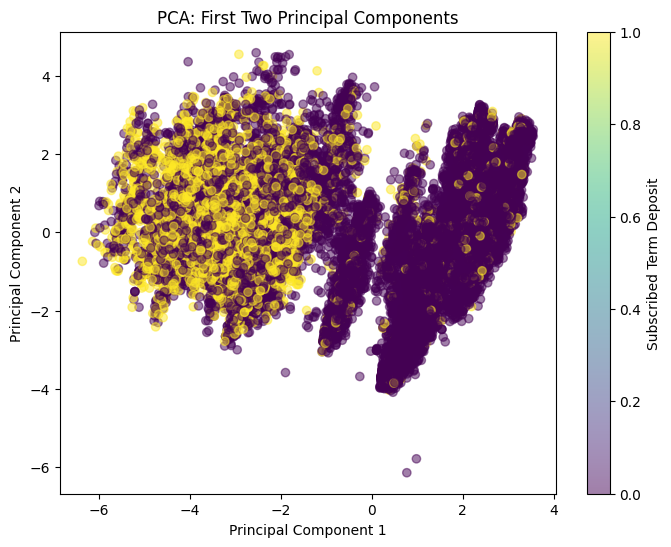

In [32]:

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])


pca_df['y'] = y.values

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['y'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Subscribed Term Deposit')
plt.show()


Now I also used t-SNE; it will reduce dimensions with non-linear connections.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


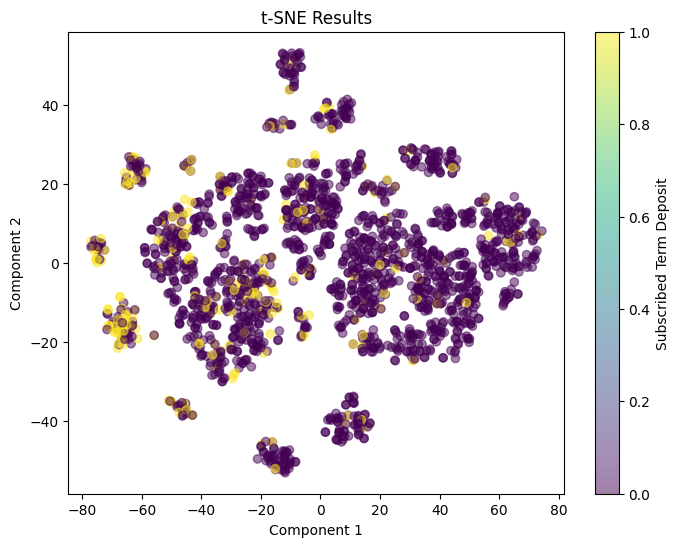

In [33]:
data_combined = X.copy()
data_combined['y'] = y

# I can't run it with all data due to this reason; I used a sample of 2000
sample_size = 2000
data_sampled = data_combined.sample(n=sample_size, random_state=42)

X_sampled = data_sampled.drop('y', axis=1)
y_sampled = data_sampled['y']

pca = PCA(n_components=30, random_state=42)
X_pca = pca.fit_transform(X_sampled)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['y'] = y_sampled.values

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df['Component 1'], tsne_df['Component 2'], c=tsne_df['y'], cmap='viridis', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Results')
plt.colorbar(scatter, label='Subscribed Term Deposit')
plt.show()
